## 3-Way ANOVA

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset**, which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [3]:
import pandas as pd

# URL to the CSV file
url = "https://github.com/kflisikowski/ds/raw/master/headache.csv"

# Load the data into a DataFrame
headache = pd.read_csv(url)

# Display the first few rows of the data
print(headache.head())

   id gender risk treatment  pain_score
0   1   male  low         X   79.311695
1   2   male  low         X   76.843399
2   3   male  low         X   70.832421
3   4   male  low         X   81.163944
4   5   male  low         X   75.052213


# Libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import pingouin as pg
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import lilliefors

# Descriptive statistics

In [5]:
descriptive_stats = headache.groupby(['treatment', 'risk', 'gender'])['pain_score'].describe()
print(descriptive_stats)

                       count       mean       std        min        25%  \
treatment risk gender                                                     
X         high female    6.0  78.865059  5.316489  68.360185  79.142521   
               male      6.0  92.738847  5.116095  86.293706  88.907525   
          low  female    6.0  74.156231  3.690272  68.613936  72.005373   
               male      6.0  76.051783  3.854876  70.832421  73.593322   
Y         high female    6.0  81.175304  4.619387  73.144392  80.011223   
               male      6.0  82.341542  5.000898  77.524462  78.951861   
          low  female    6.0  68.361925  4.081842  63.732617  65.236456   
               male      6.0  73.138772  4.765061  67.923560  69.455207   
Z         high female    6.0  81.035142  3.984886  74.988057  79.811669   
               male      6.0  79.680736  4.045885  74.419865  76.602057   
          low  female    6.0  69.779555  2.719645  65.449408  68.866039   
               male      

# Outliers

Outliers


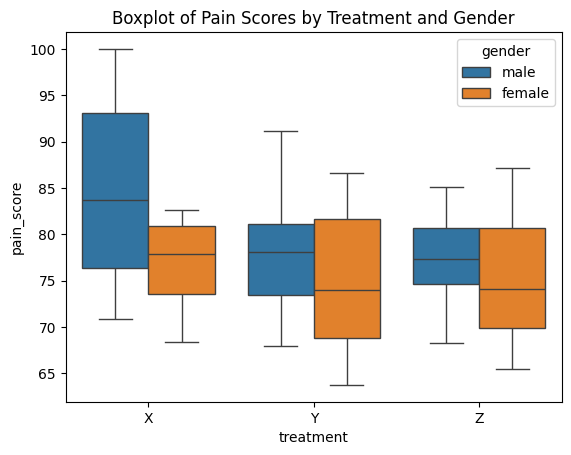

In [15]:
print("Outliers")
sns.boxplot(x='treatment', y='pain_score', hue='gender', data=headache)
plt.title('Boxplot of Pain Scores by Treatment and Gender')
plt.show()


# Normality

In [8]:
print("Normality")
groups = headache.groupby(['treatment', 'risk', 'gender'])
for group_name, group_data in groups:
    _, p_value = lilliefors(group_data['pain_score'], dist='norm')
    print(f"Group {group_name}: Lilliefors Test p-value = {p_value:.4f}")

Normality
Group ('X', 'high', 'female'): Lilliefors Test p-value = 0.0675
Group ('X', 'high', 'male'): Lilliefors Test p-value = 0.8333
Group ('X', 'low', 'female'): Lilliefors Test p-value = 0.8028
Group ('X', 'low', 'male'): Lilliefors Test p-value = 0.9805
Group ('Y', 'high', 'female'): Lilliefors Test p-value = 0.6589
Group ('Y', 'high', 'male'): Lilliefors Test p-value = 0.8261
Group ('Y', 'low', 'female'): Lilliefors Test p-value = 0.7728
Group ('Y', 'low', 'male'): Lilliefors Test p-value = 0.7612
Group ('Z', 'high', 'female'): Lilliefors Test p-value = 0.6921
Group ('Z', 'high', 'male'): Lilliefors Test p-value = 0.8383
Group ('Z', 'low', 'female'): Lilliefors Test p-value = 0.6823
Group ('Z', 'low', 'male'): Lilliefors Test p-value = 0.7689


All groups had p-values greater than 0.05, indicating no significant deviation from normality. Thus, the normality assumption is satisfied.


# Homogeneity of variance

In [9]:
print("Homogeneity of Variance")
anova_model = ols('pain_score ~ C(treatment) * C(risk) * C(gender)', data=headache).fit()
_, p_bp, _, _ = het_breuschpagan(anova_model.resid, anova_model.model.exog)
print(f"Breusch-Pagan Test p-value: {p_bp:.4f}")

Homogeneity of Variance
Breusch-Pagan Test p-value: 0.9644


The Breusch-Pagan test yielded a p-value of 0.9644, which is much greater than 0.05. This suggests that the variances are homogeneous across the groups, satisfying this assumption.

# Anova

In [10]:
print("ANOVA")
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(anova_model, typ=2)
print(anova_results)


ANOVA
                                     sum_sq    df          F        PR(>F)
C(treatment)                     283.168031   2.0   7.317679  1.432844e-03
C(risk)                         1793.555757   1.0  92.698774  8.799980e-14
C(gender)                        313.358773   1.0  16.195746  1.625409e-04
C(treatment):C(risk)              27.595016   2.0   0.713115  4.942214e-01
C(treatment):C(gender)           129.182324   2.0   3.338353  4.220011e-02
C(risk):C(gender)                  2.730584   1.0   0.141128  7.084867e-01
C(treatment):C(risk):C(gender)   286.595625   2.0   7.406255  1.334476e-03
Residual                        1160.892871  60.0        NaN           NaN


# Main Effects:

Treatment (p=0.0014): Significant. Different treatments result in varying pain scores.

Risk (p<0.0001): Highly significant. Pain scores differ significantly between low and high migraine risk participants.

Gender (p=0.00016): Significant. Males and females experience different levels of pain.


# Two-Way Interactions:

Treatment × Risk (p=0.4942): Not significant. No evidence of interaction between treatment type and migraine risk.

Treatment × Gender (p=0.0422): Significant. The effect of treatment varies by gender.

Risk × Gender (p=0.7085): Not significant. The effect of migraine risk does not differ by gender.



# Three-Way Interaction:


Treatment × Risk × Gender (p=0.0013): Significant. The combined effect of treatment, migraine risk, and gender significantly influences pain scores.

In [ ]:
# Decompose the significant three-way interaction
# Run two-way interaction tests at each level of the third variable

# Each gender
for gender in headache['gender'].unique():
    print(f"Two-way interaction for gender: {gender}")
    subset = headache[headache['gender'] == gender]
    interaction = pg.anova(dv='pain_score', between=['treatment', 'risk'], data=subset, detailed=True)
    print(interaction)

# Decompose significant two-way interactions into one-way tests
# Each risk
for risk in headache['risk'].unique():
    print(f"One-way ANOVA for risk: {risk}")
    subset = headache[headache['risk'] == risk]
    one_way = pg.anova(dv='pain_score', between='treatment', data=subset, detailed=True)
    print(one_way)

# Pairwise comparisons for significant main effects or simple main effects
pairwise_results = pairwise_tukeyhsd(
    endog=headache['pain_score'],  # Dependent variable
    groups=headache['treatment'],  # Independent variable
    alpha=0.05
)
print(pairwise_results)


Two-way interaction for gender: male
             Source          SS  DF          MS          F         p-unc  \
0         treatment  393.710706   2  196.855353   9.154682  7.876787e-04   
1              risk  968.124984   1  968.124984  45.022276  1.954190e-07   
2  treatment * risk  203.220142   2  101.610071   4.725337  1.644381e-02   
3          Residual  645.097320  30   21.503244        NaN           NaN   

        np2  
0  0.379002  
1  0.600119  
2  0.239557  
3       NaN  
Two-way interaction for gender: female
             Source          SS  DF          MS          F         p-unc  \
0         treatment   18.639649   2    9.319825   0.542065  5.871351e-01   
1              risk  828.161356   1  828.161356  48.168001  1.042751e-07   
2  treatment * risk  110.970499   2   55.485249   3.227165  5.377519e-02   
3          Residual  515.795551  30   17.193185        NaN           NaN   

        np2  
0  0.034877  
1  0.616211  
2  0.177053  
3       NaN  
One-way ANOVA for risk

# Post-Hoc Analysis Summary and Interpretation:

## Two-Way Interaction by Gender

### For Males:

Treatment: Significant (p=0.0008), indicating the effect of treatment differs across levels.

Risk: Highly significant (p=1.95×10^−7), indicating migraine risk influences pain scores.

Treatment × Risk Interaction: Significant (p=0.0164), suggesting the effect of treatment depends on migraine risk level.

### For Females:

Treatment: Not significant (p=0.587).

Risk: Highly significant (p=1.04×10^−7).

Treatment × Risk Interaction: Marginally non-significant (p=0.0538), indicating weak evidence that treatment effects depend on migraine risk for females.

## Simple Main Effects (Risk Levels)

### Low Risk:

Treatment effect is non-significant (p=0.060), indicating weak evidence for differences in treatments under low migraine risk.

### High Risk:

Treatment effect is also non-significant (p=0.095), suggesting no strong evidence of treatment differences under high migraine risk.

## Pairwise Comparisons:

No significant differences between any treatment pairs (all p>0.05) after adjusting for multiple comparisons using Tukey's HSD.
